In [65]:
# mount Drive to access data files
from google.colab import drive
drive.mount('./mount')

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


In [66]:
# import libraries
# import torch for nn
import torch
import torch.nn as nn
from torch.utils.data import Dataset

# import pandas to read csv files
import pandas

# import matplotlib to show images
import matplotlib.pyplot as plt

In [76]:
class Classifier(nn.Module):

  def __init__(self):
    # initialse parent pytorch class
    super().__init__()

    # define neural network layers
    self.model = nn.Sequential(
        nn.Linear(784, 200),
        nn.Sigmoid(),
        nn.Linear(200, 10),
        nn.Sigmoid()
    )

    # create loss function
    self.loss_function = nn.MSELoss()

    # create optimiser, using simple stochastic gradient descent
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    # counter and accumulator for progress
    self.counter = 0
    self.progress = []

    pass

  def forward(self, inputs):
    # simply run model
    return self.model(inputs)

  def train(self, inputs, targets):
    # caclculate the output of the network
    outputs = self.forward(inputs)

    # calculate loss
    loss = self.loss_function(outputs, targets)

    # zero gradients, perform backward pass, and update the weights
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    # increase counter and accumulate error every 10
    self.counter += 1
    if (self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass

    if (self.counter % 10000 == 0):
      print("counter = ", self.counter)
      pass

    pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(
      ylim=(0, 1.0),
      figsize=(16,8),
      alpha=0.1,
      marker='.',
      grid=True,
      yticks=(0, 0.25, 0.5)
    )
    pass

  pass

class MnistDataset(Dataset):

  def __init__(self, csv_file):
    self.data_df = pandas.read_csv(csv_file, header=None)
    pass

  def __len__(self):
    return len(self.data_df)

  def __getitem__(self, index):
    # image target (label)
    label = self.data_df.iloc[index,0]
    target = torch.zeros((10))
    target[label] = 1.0

    # image data, normalised from 0-255 to 0-1
    image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0

    # return label, image data tensor and target tensor
    return label, image_values, target

  def plot_image(self, index):
    img = self.data_df.iloc[index,1:].values.reshape(28,28)
    plt.title("label = " + str(self.data_df.iloc[index,0]))
    plt.imshow(img, interpolation='none', cmap='Blues')
    pass

  pass

In [68]:
mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/mnist_data/mnist_train.csv')

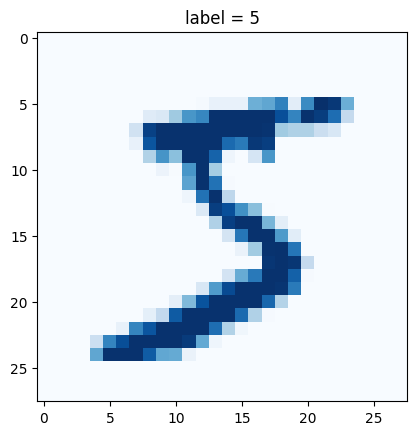

In [69]:
mnist_dataset.plot_image(0)

In [70]:
%%time
# create neural network
C = Classifier()
# train network on MNIST data set
epochs = 3
for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label, image_data_tensor, target_sensor in mnist_dataset:
    C.train(image_data_tensor, target_sensor)
    pass
  pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 4min 28s, sys: 1.96 s, total: 4min 30s
Wall time: 4min 32s


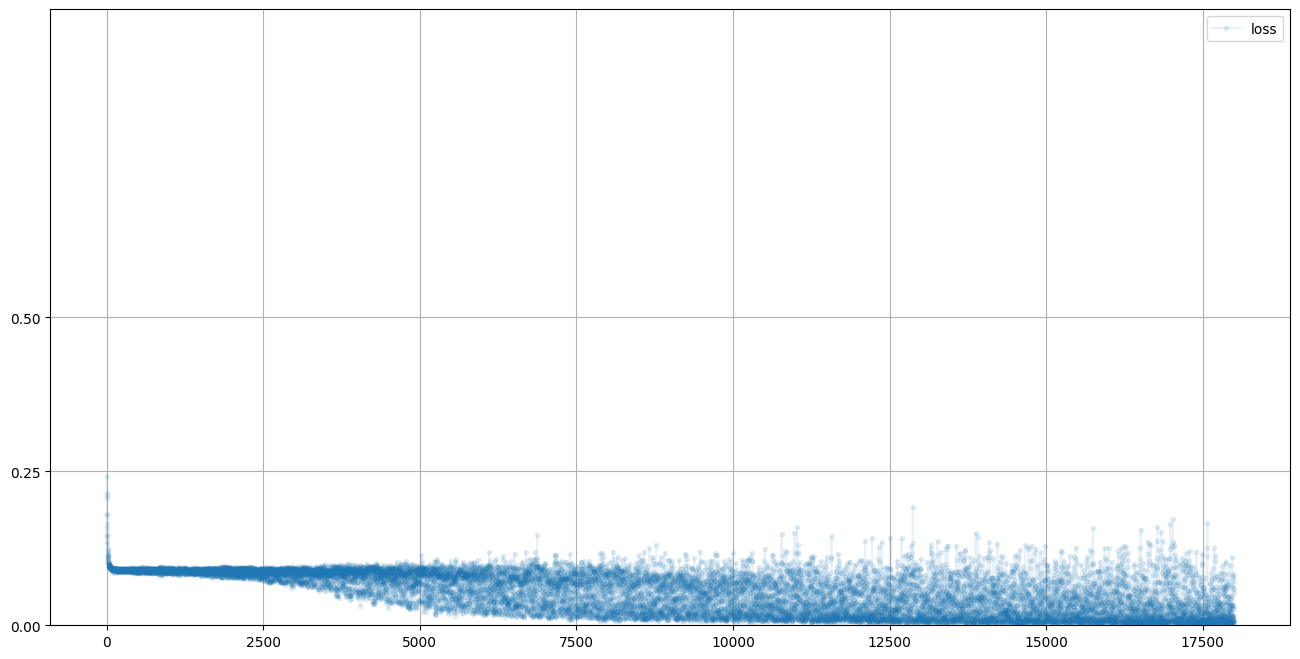

In [71]:
# plot classifier error
C.plot_progress()

In [72]:
# load MNIST test data
mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/mnist_data/mnist_test.csv')

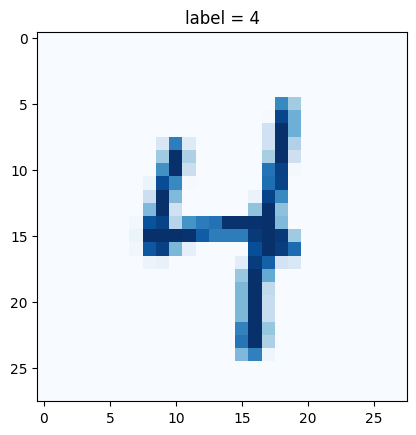

In [73]:
# pick a record
record = 19

# plot image and correct label
mnist_test_dataset.plot_image(record)

<Axes: >

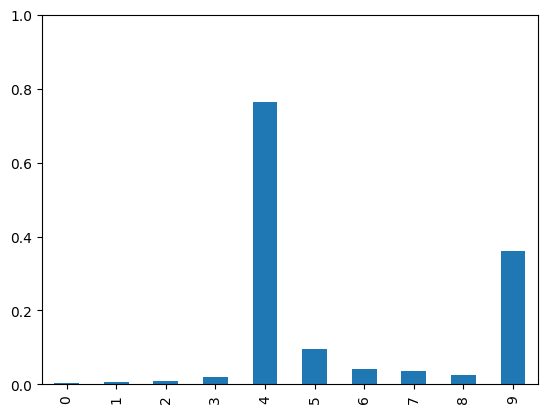

In [74]:
image_data = mnist_test_dataset[record][1]

# query from trained network
output = C.forward(image_data)

# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(
  kind='bar',
  legend=False,
  ylim=(0, 1)
)

In [75]:
# test trained neural network on training data
score = 0
items = 0
for label, image_data_tensor, target_sensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  if (answer.argmax() == label):
    score += 1
    pass
  items += 1

  pass

print(score, items, score/items)

8674 10000 0.8674
